In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Corregido
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt  # Corregido
import warnings
warnings.filterwarnings("ignore")  # Corregido

__Ejemplo 1__

In [4]:
fraudes = pd.read_csv("Fraude.csv")
fraudes.head()

,ID,Reembolso,EdoCivil,Ingresos,Fraude
0,1,Sí,Soltero,125000,No
1,2,No,Casado,100000,No
2,3,No,Soltero,70000,No
3,4,Sí,Casado,120000,No
4,5,No,Divorciado,95000,Sí


In [5]:
from sklearn import preprocessing

feature_cols = ["Reembolso", "EdoCivil", "Ingresos"]
x = fraudes[feature_cols].copy()  # importante: copia para no modificar el original

# Codificar 'Reembolso'
Cod_Reembolso = preprocessing.LabelEncoder()
x['Reembolso'] = Cod_Reembolso.fit_transform(x['Reembolso'])

# Codificar 'EdoCivil'
Cod_EdoCivil = preprocessing.LabelEncoder()
x['EdoCivil'] = Cod_EdoCivil.fit_transform(x['EdoCivil'])

y = fraudes['Fraude']


In [6]:
x.values[0:5]

array([[     1,      2, 125000],
       [     0,      0, 100000],
       [     0,      2,  70000],
       [     1,      0, 120000],
       [     0,      1,  95000]], dtype=int64)

In [7]:
y.values[0:5]

array(['No', 'No', 'No', 'No', 'Sí'], dtype=object)

In [8]:
## Creación de grupos de entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [9]:
##Crear objeto de clasificación del arbol de decision
clf= DecisionTreeClassifier()

##Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
clf = clf.fit(x_train,y_train)

##Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(x_test)

In [10]:
x_test

,Reembolso,EdoCivil,Ingresos
2,0,2,70000
9,0,2,90000
6,1,1,220000


In [11]:
y_test

2    No
9    Sí
6    No
Name: Fraude, dtype: object

In [13]:
y_pred

array(['Sí', 'Sí', 'No'], dtype=object)

In [23]:
##Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [0, 1]], dtype=int64)

In [25]:
##Estadisticas de desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.50      0.67         2
          Sí       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [27]:
##Instalacion de bibliotecas necesarias para graficar el arbol de decision
!pip install graphviz
!pip install pydotplus

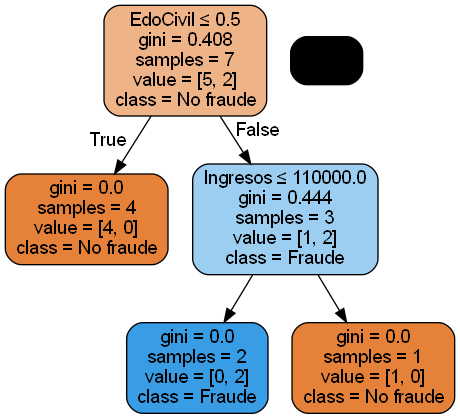

In [28]:
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    class_names=["No fraude", "Fraude"],
    filled=True,
    rounded=True,
    special_characters=True
)

# No uses 'graph' como alias de pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el árbol en Jupyter
Image(graph.create_png())


In [29]:
from PIL import Image

graph.write_pdf("fraudes.pdf")
graph.write_png("fraudes.png")  # Usar write_png, no write()

# Abrir y mostrar la imagen
img = Image.open("fraudes.png")
img.show()


**Ejemplo 2**

In [31]:
pima=pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
col_names=("Pregnant","Glucosa","BP","Skin","Insulina","BMI","Pedigree","Age","Label")

In [48]:
pima=pd.read_csv("diabetes.csv",header=None,names=col_names)
pima.head()

,Pregnant,Glucosa,BP,Skin,Insulina,BMI,Pedigree,Age,Label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [50]:
df=pima.iloc[1:,]
df

,Pregnant,Glucosa,BP,Skin,Insulina,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [61]:
##Seleccion de caracteristicas
feature_cols= ["Pregnant","Insulina","BMI","Age","Glucosa","BP","Pedigree"]
x= df[feature_cols]
y= df.Label

In [63]:
x

,Pregnant,Insulina,BMI,Age,Glucosa,BP,Pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
764,10,180,32.9,63,101,76,0.171
765,2,0,36.8,27,122,70,0.34
766,5,112,26.2,30,121,72,0.245
767,1,0,30.1,47,126,60,0.349


In [65]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: Label, Length: 768, dtype: object

In [69]:
## Creación de grupos de entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [73]:
##Crear objeto de clasificación del arbol de decision
clf= DecisionTreeClassifier(criterion="gini")

##Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
clf = clf.fit(x_train,y_train)

##Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(x_test)

In [75]:
##Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[80, 19],
       [24, 31]], dtype=int64)

In [77]:
##Estadisticas de desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        99
           1       0.62      0.56      0.59        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



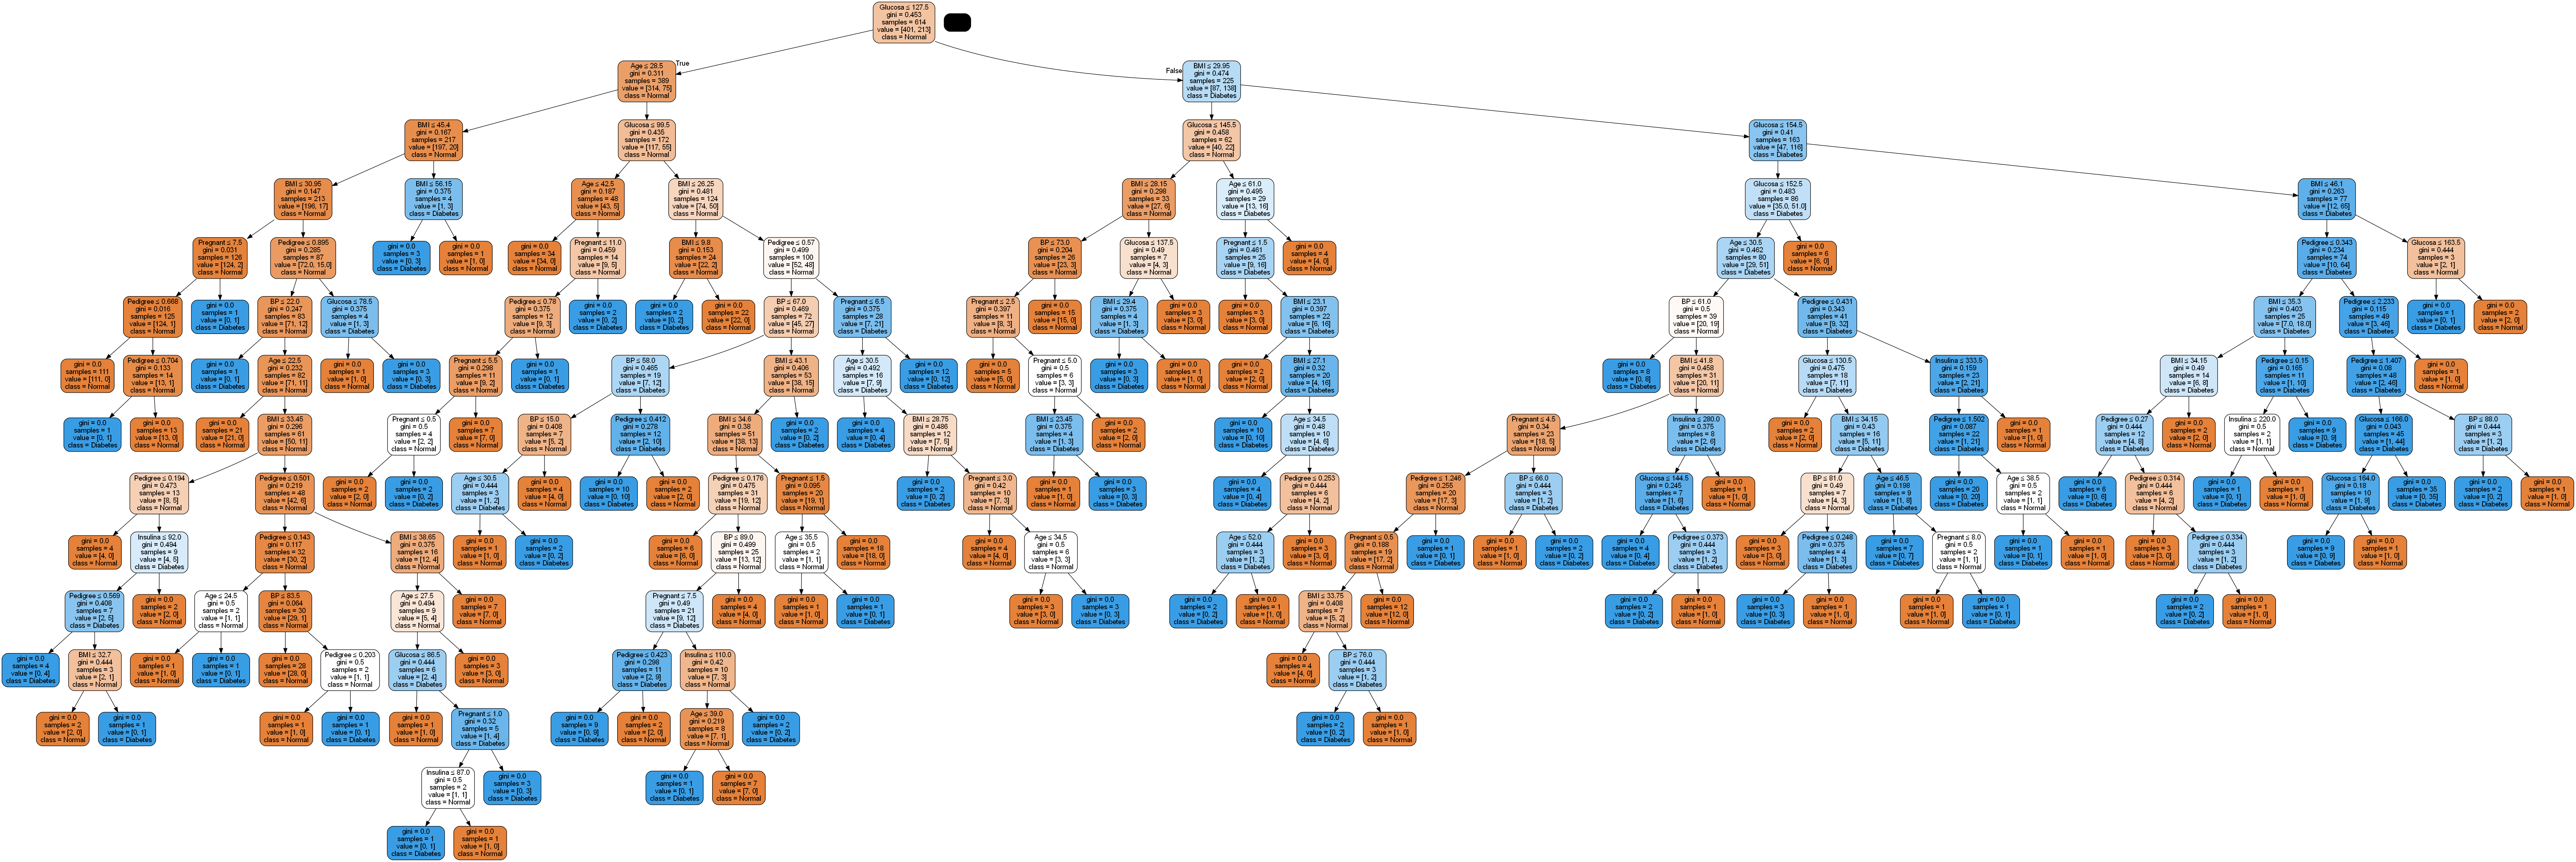

In [81]:
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    class_names=["Normal", "Diabetes"],
    filled=True,
    rounded=True,
    special_characters=True
)

# No uses 'graph' como alias de pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el árbol en Jupyter
Image(graph.create_png())

In [ ]:
from PIL import Image

graph.write_pdf("Diabetes.pdf")
graph.write_png("Diabetes.png")  # Usar write_png, no write()

# Abrir y mostrar la imagen
img = Image.open("Diabetes.png")
img.show()


**Optimización de desempeño del árbol de decicion**

In [98]:
##Crear objeto de clasificación del arbol de decision
clf= DecisionTreeClassifier(criterion="entropy",max_depth=3)

##Aplicación del algoritmo de árboles de decisión a los grupos de entrenamiento
clf = clf.fit(x_train,y_train)

##Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(x_test)

In [100]:
##Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[88, 11],
       [20, 35]], dtype=int64)

In [102]:
##Estadisticas de desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



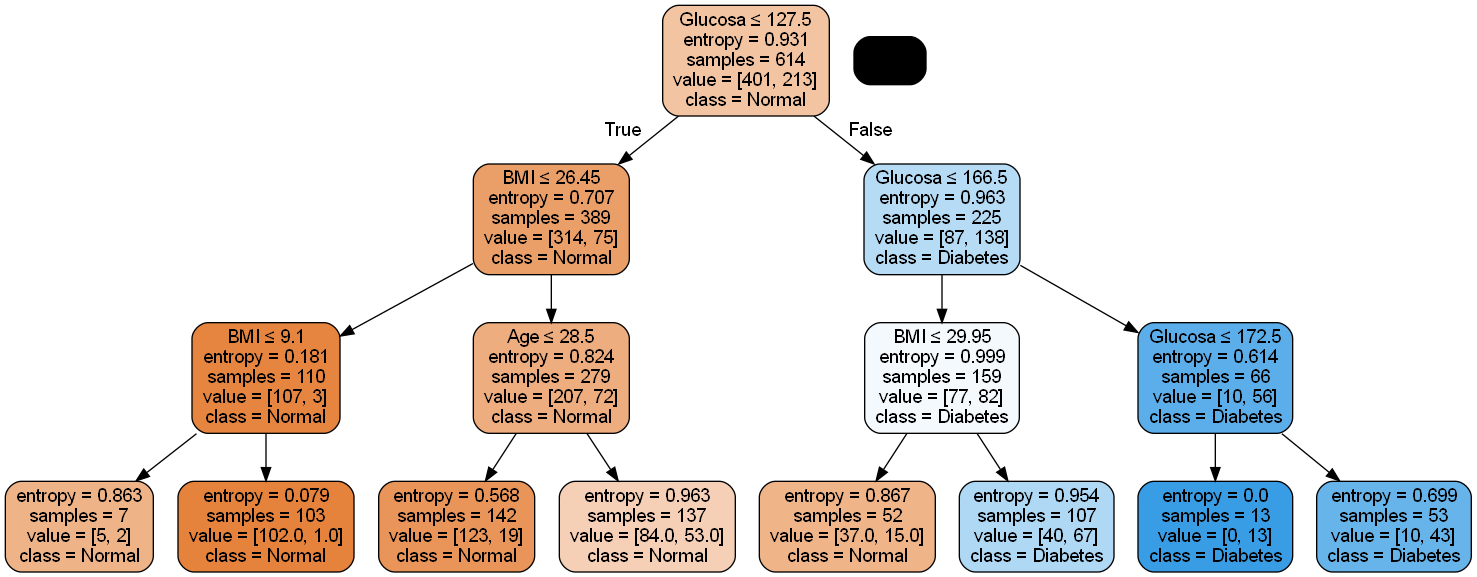

In [104]:
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    class_names=["Normal", "Diabetes"],
    filled=True,
    rounded=True,
    special_characters=True
)

# No uses 'graph' como alias de pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el árbol en Jupyter
Image(graph.create_png())

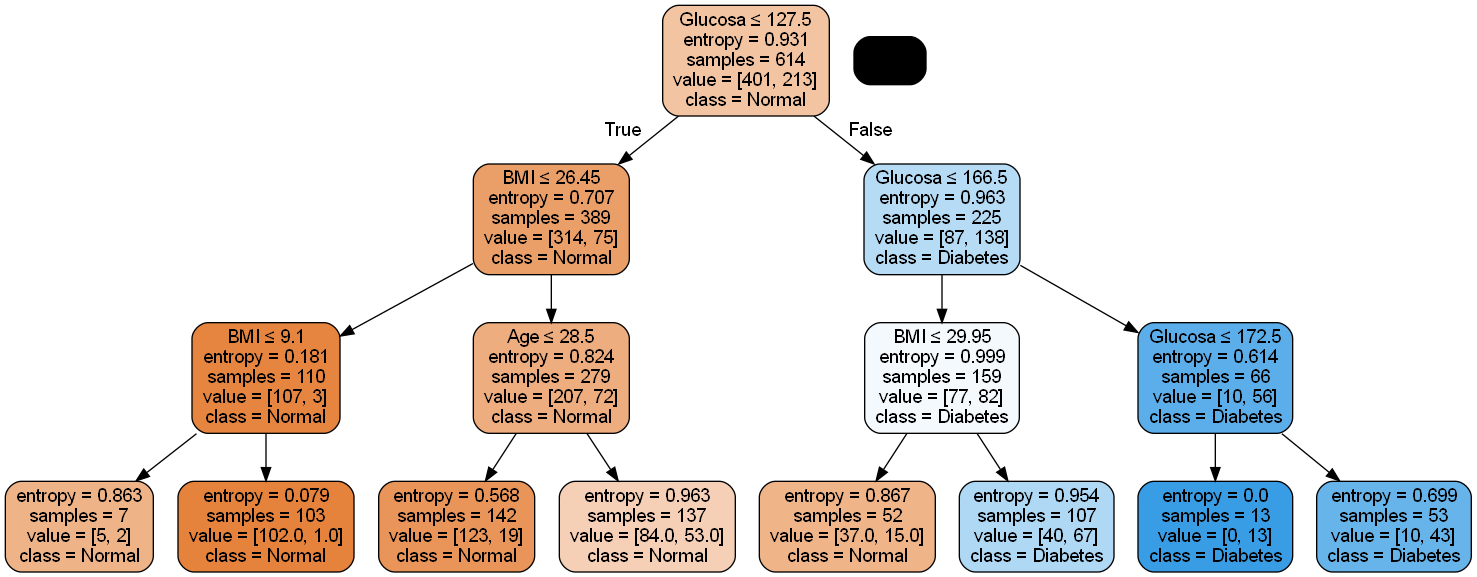

In [119]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

# Exportar el árbol de decisión a formato DOT
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True,
                feature_names=feature_cols, class_names=["Normal", "Diabetes"])

# Crear gráfico desde el archivo DOT
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Opcional: guardar como PDF o PNG
graph.write_pdf("diabetes_tree.png")
Image(graph.create_png())